In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Read CSV file from the folder in the current directory
obesity_file = pd.read_csv('./Data/obesityprediction.csv')

#Concvert the dataset to the panda dataframe
obesity_df = pd.DataFrame(obesity_file)

#Rename the columns to understand the content of the feature easier
obesity_df.rename(columns={'FAVC':'HCal','FCVC':'Veg','NCP':'MainMeal','CAEC':'BTWMeal','SCC':'CalCount','FAF':'Gym','TUE':'Screen','CALC':'Alcol','MTRANS':'Trans'},inplace=True)

#Few rows of head of the dataset
obesity_df.head(3)

# Few rows of tail of dataset
obesity_df.tail(3)

#Get the information about Dataframe
obesity_df.info();

#How many numeric features and how many categorical features are there in the dataframe
numeric_features_no = obesity_df.select_dtypes(include=['float64','number','int64']).shape[1]
print(f'\nThere are {numeric_features_no} Numerical Features in the dataset ')

categoric_features_no = obesity_df.select_dtypes(include=['object','category']).shape[1]
print(f'\nThere are {categoric_features_no} Categorical Features in the dataset ')

#brief descriptions about the dataset
print(obesity_df.describe())
obesity_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   HCal            2111 non-null   object 
 6   Veg             2111 non-null   float64
 7   MainMeal        2111 non-null   float64
 8   BTWMeal         2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  CalCount        2111 non-null   object 
 12  Gym             2111 non-null   float64
 13  Screen          2111 non-null   float64
 14  Alcol           2111 non-null   object 
 15  Trans           2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

,Gender,Age,Height,Weight,family_history,HCal,Veg,MainMeal,BTWMeal,SMOKE,CH2O,CalCount,Gym,Screen,Alcol,Trans,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In the dataset above We have 8 Numerical Features and 9 Categorical Features.Half of the data has age around 24 years old. Average of the Height is 170 cm and average Weight is 86.58KG. in average people have 2.68 mail meal per day.

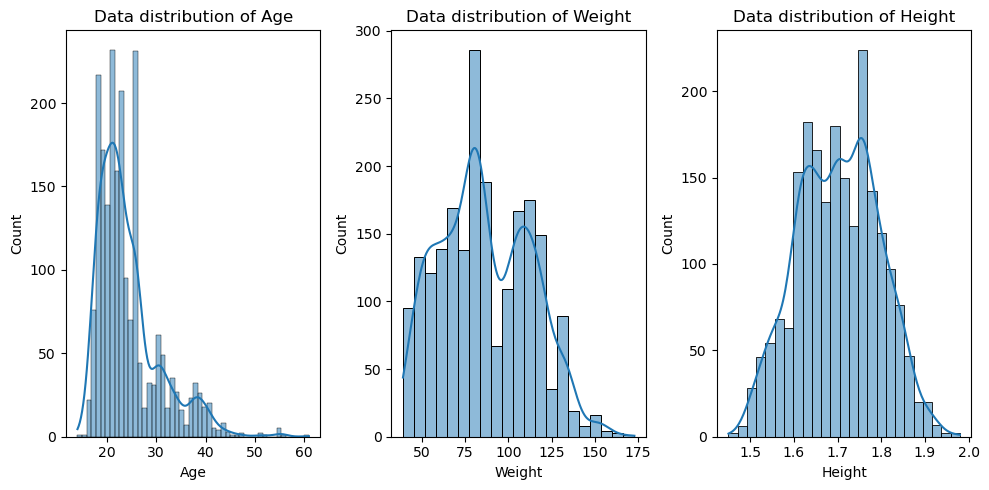

The oldest person in datase is 61 years old. 
The youngest person is 14 years old.
The maximum weight is 173.0 KG. 
The minimum weigth is 39.0 KG
The maximum height is 1.98 CM. 
The minimum heigth is 1.45 CM


In [13]:
# Visualize the distribution of main numerical features
#
plt.figure(figsize=(10, 5))

for i, column in enumerate(obesity_df[['Age','Weight','Height']]):
    plt.subplot(1, 3, i+1)
    sns.histplot(obesity_df[column], kde=True)
    plt.title(f'Data distribution of {column}')
plt.tight_layout()
plt.show()

#Based on the information below we can see maximum and minimum Age, Weight and Height description
print(f'The oldest person in datase is {int(obesity_df['Age'].max())} years old. \nThe youngest person is {int(obesity_df['Age'].min())} years old.')
print(f'The maximum weight is {obesity_df['Weight'].max()} KG. \nThe minimum weigth is {obesity_df['Weight'].min()} KG')
print(f'The maximum height is {obesity_df['Height'].max()} CM. \nThe minimum heigth is {obesity_df['Height'].min()} CM')

In the map above, we can see the corrolation between the numerical features. The obesity is not in the map as it was the categorical feature. The highest correlation is between 'Weight' and 'Height'

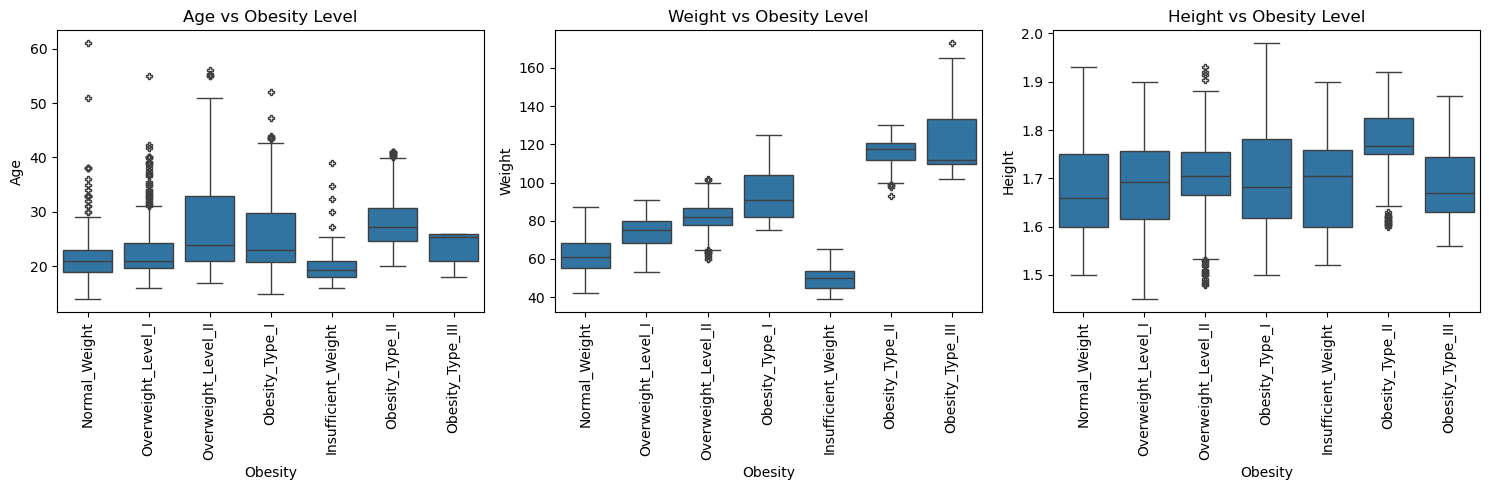

In [93]:
# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Boxplot for Age vs Obesity
sns.boxplot(x='Obesity', y='Age', data=obesity_df, ax=axes[0], flierprops={'marker': 'P', 'markersize': 5})
axes[0].set_title('Age vs Obesity Level')
axes[0].tick_params(axis='x', labelsize=10, rotation=90)

# Boxplot for Weight vs Obesity
sns.boxplot(x='Obesity', y='Weight', data=obesity_df, ax=axes[1], flierprops={'marker': 'P', 'markersize': 5})
axes[1].set_title('Weight vs Obesity Level')
axes[1].tick_params(axis='x', labelsize=10, rotation=90)

# Boxplot for Height vs Obesity
sns.boxplot(x='Obesity', y='Height', data=obesity_df, ax=axes[2], flierprops={'marker': 'P', 'markersize': 5})
axes[2].set_title('Height vs Obesity Level')
axes[2].tick_params(axis='x', labelsize=10, rotation=90)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


In the plots above:

**Weight vs. Obesity Level:**

- As expected, the weight increases as obesity levels rise.
- Weight is a key differentiating factor among different obesity levels, showing a clear increasing trend.
- Age and height do not show a strong correlation with obesity.
- Outliers exist, particularly in weight and age, which could represent unusual cases


How is obesity distributed across the population?


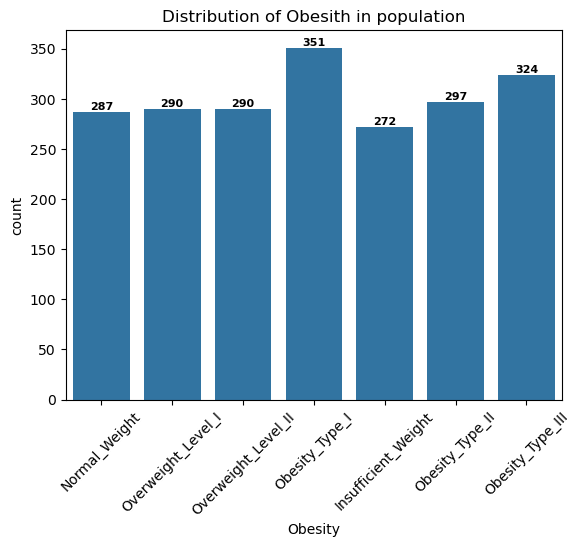

<Figure size 800x600 with 0 Axes>

In [41]:
ax = sns.countplot(x=obesity_df['Obesity'])

# Add count labels automatically using bar_label
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge', fontsize=8, color='black', fontweight='bold')
plt.xticks(rotation=45)
plt.title('Distribution of Obesity in population')
plt.figure(figsize=(8,6));

In the graph above
- Obesity Type I has the highest count (351 individuals), followed by Obesity Type III (324 individuals) and Obesity Type II (297 individuals).
- This suggests that a lots of people are categorized in higher obesity type.
- Normal Weight individuals account for 287, indicating that there is a relatively balanced distribution of overweight and normal-weight individuals.

Text(0.5, 1.0, 'Obesity vs weight')

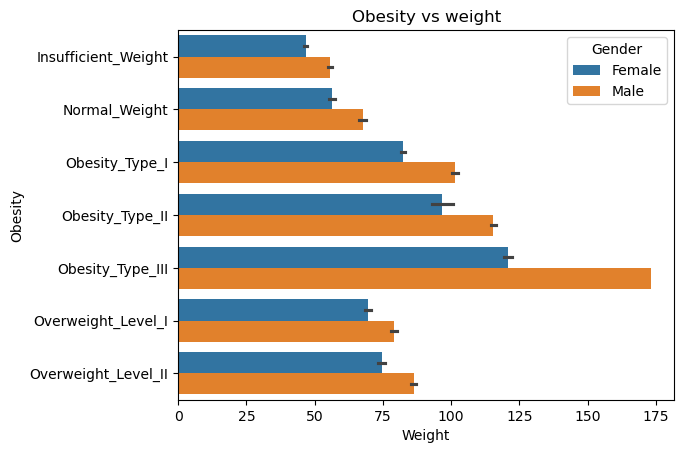

In [17]:
#distribution of data
obesity_sorted = obesity_df.sort_values(by='Obesity')

sns.barplot(data=obesity_sorted, x='Weight',y='Obesity', hue='Gender');
plt.title('Obesity vs weight')

In the graph above:
- Categories such as Obesity Type I, II, III are expected to have higher weight values compared to Normal Weight or Underweight groups.
- Only in one obesity type (Obesity type III) we seea big difference between the genders otherwise they have similar distributions.
- As obesity levels increase, the average weight also increases, which is expected since weight is a primary factor in obesity classification.

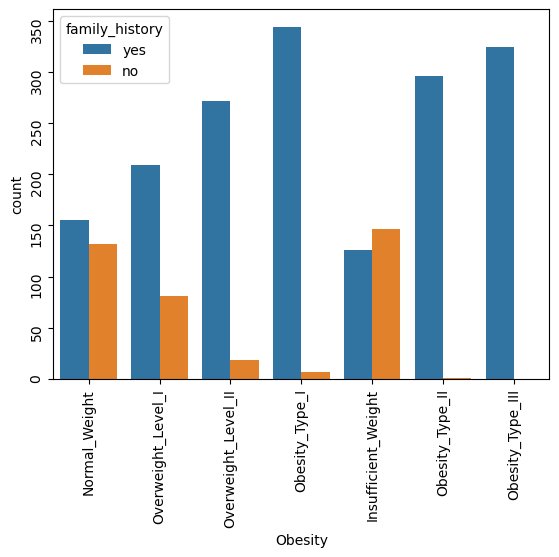

In [20]:
ax = sns.countplot(data= obesity_df, x='Obesity', hue='family_history')
ax.tick_params(labelrotation=90)

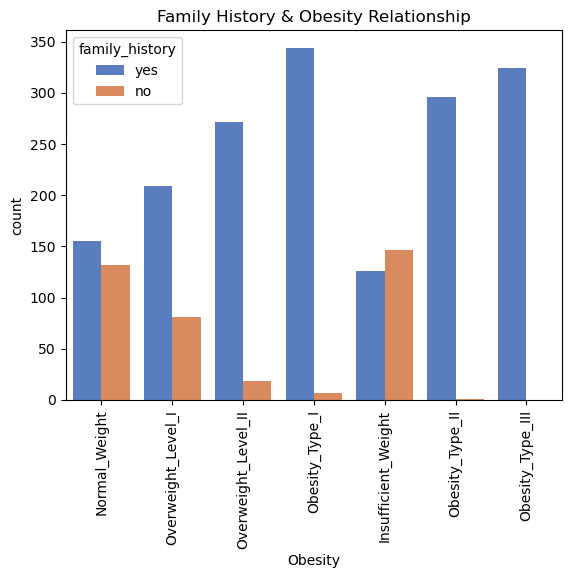

In [21]:
sns.countplot(x="Obesity", hue="family_history", data=obesity_df, palette="muted")
plt.xticks(rotation=90)
plt.title("Family History & Obesity Relationship")
plt.show()


Does a family history of obesity affect a persons obesity level?
in the graph above we will see that:
- People with a family history of obesity ("yes") are more common in the higher Obesity Type I, II, III
- This suggests that genetics and family background play a role in the likelihood of obesity.
- Underweight and Normal Weight people seem to have a more even split between those with and without a family history of obesity.
- This indicates that lifestyle factors might be more dominant in maintaining lower obesity levels, rather than just genetics.


Do men and women have different obesity levels?

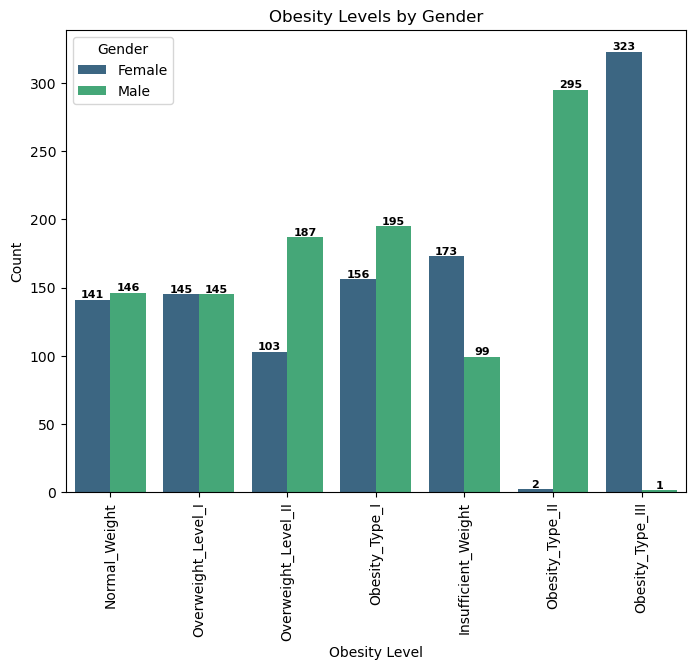

In [32]:
# Create a count plot for obesity levels by gender with automatic bar labels
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Obesity', hue='Gender', data=obesity_df, palette='viridis')

# Add count labels automatically using bar_label
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge', fontsize=8, color='black', fontweight='bold')
ax.bar_label(ax.containers[1], fmt='%d', label_type='edge', fontsize=8, color='black', fontweight='bold')

# Adjust plot appearance
plt.xticks(rotation=90)
plt.title('Obesity Levels by Gender')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


In the graph above:
- Obesity Type II is predominantly male, with 295 males compared to only 2 females.
- Obesity Type III is predominantly female, with 323 females and only 1 male.
- Obesity Type I is slightly more common in males (195 males vs. 156 females), but the difference is not as extreme.
- More females (173) than males (99) fall under Insufficient Weight

What is the average age of people in each obesity category?

In [129]:
obesity_df.groupby("Obesity")["Age"].mean()


Obesity
Insufficient_Weight    19.783237
Normal_Weight          21.738676
Obesity_Type_I         25.884941
Obesity_Type_II        28.233785
Obesity_Type_III       23.495554
Overweight_Level_I     23.417674
Overweight_Level_II    26.996981
Name: Age, dtype: float64

In [ ]:
Does physical activity (FAF) correlate with obesity?

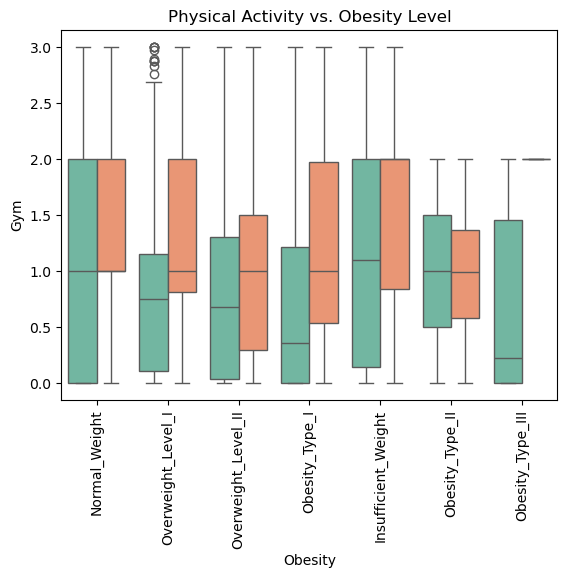

In [45]:
sns.boxplot(x="Obesity", y="Gym", data=obesity_df, palette="Set2", hue='Gender', legend= False)
plt.xticks(rotation=90)
plt.title("Physical Activity vs. Obesity Level")
plt.show()


Observation in the boxplot above:

- Insufficient Weight and Normal Weight groups have the highest median of physical activity.
- The mean Gym values are around 1.25, suggesting they engage in gym or physical activity more frequently.
- Obesity Type I, II, and III categories show a decreasing trend in physical activity.
- Obesity Type III has the lowest mean gym shows very low engagement in physical activity.
- Overweight Level I and II individuals have moderate physical activity levels, with a mean around 0.95 to 1.05.
- This suggests that not all obese individuals are inactive, but the majority engage in less frequent exercise.
